In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../functions")

from Utility import *

%matplotlib inline
%load_ext jupyter_black

# plt.style.use("../matplotlib_style.txt")

## Read Data and Preprocessing 

In [5]:
raw_data = pd.read_csv("../data/twoArmedandit_with_confidence.csv")
# selecting usefull columns
data = raw_data[
    [
        "sub",
        "condition",
        "cresp",
        "resp",
        "cor",
        "cj",
        "phase",
        "trial",
        "trial_rev",
        "reward",
        "Lreward",
        "Hreward",
    ]
]
# excluding chance level subjects
chance_level_subjects = [45634, 46069, 46279, 46303, 46651, 47398]

# selecting portion of data with proper task
lv_induction_data = data[
    (data["phase"] == "induction")
    & (data["condition"] == "hc")
    & (~data["sub"].isin(chance_level_subjects))
]
subjects = lv_induction_data["sub"].unique()

## Fitting Backward and Forward

In [ ]:
from Fitting import fit_for_all_subjects
from Forward import forward_fitting

params_ranges = [[0, 1], [0, 100], [1, 5], [0, 1]]
n_fitting = 3
n_threads = 2
res = fit_for_all_subjects(
    params_ranges, n_threads, n_fitting, subjects, lv_induction_data, forward_fitting
)
forward_df = make_df_after_fitting(
    res, ["alpha", "beta", "lbound", "bound_range"], subjects
)
forward_df["hbound"] = (5 - forward_df["lbound"]) * (
    forward_df["bound_range"]
) + forward_df["lbound"]

forward_df.to_csv("../results/forward_df.csv")

In [ ]:

min_neg_lls = np.zeros((len(subjects), n_fitting))
for i, r in enumerate(res):
    min_neg_lls[i, :] = r[1]

plt.plot(np.mean(min_neg_lls, axis=0))
plt.show()

In [ ]:
from Backward import backward_fitting

back_res = fit_for_all_subjects(
    params_ranges, n_threads, n_fitting, subjects, lv_induction_data, backward_fitting
)
backward_df = make_df_after_fitting(
    back_res, ["alpha", "beta", "lbound", "bound_range"], subjects
)
backward_df["hbound"] = (5 - backward_df["lbound"]) * (
    backward_df["bound_range"]
) + backward_df["lbound"]

backward_df.to_csv("../results/backward_df.csv")

## Results

In [6]:
forward_df = pd.read_csv("../results/forward_df.csv")
backward_df = pd.read_csv("../results/backward_df.csv")

Statistics=81.0, p=5.161522855504245e-07
Statistics=442.0, p=0.009671153867644833


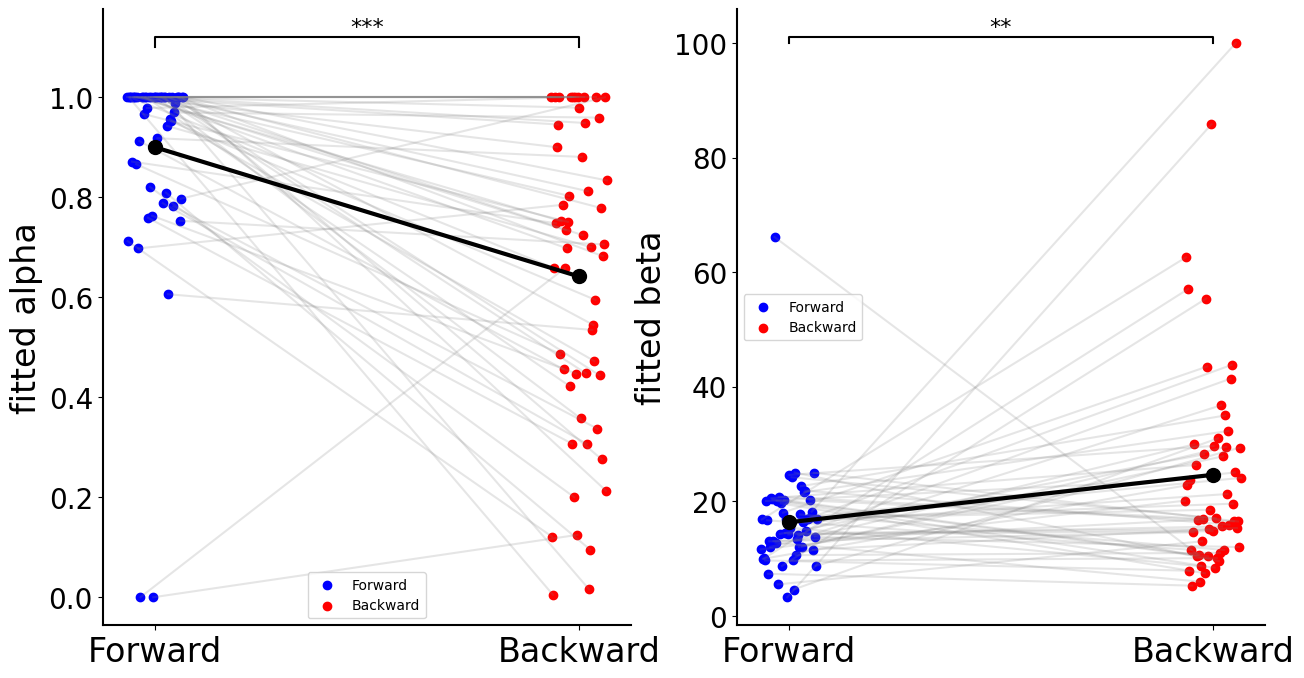

In [9]:
from Plotting import comparison_plot
from Utility import merge_result_df

groups = ["Forward", "Backward"]
df = merge_result_df([forward_df, backward_df], groups, 400, subjects)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
comparison_plot(
    df,
    "alpha",
    groups,
    "",
    [["Forward", "Backward"]],
    [1.1],
    [0.02],
    y_label="fitted alpha",
)
plt.subplot(1, 2, 2)
comparison_plot(
    df,
    "beta",
    groups,
    "",
    [["Forward", "Backward"]],
    [100],
    [1],
    y_label="fitted beta",
)

plt.savefig("../figs/alpha_beta.png")

Statistics=466.0, p=0.2108255907095561
Statistics=463.0, p=0.016103737961499776


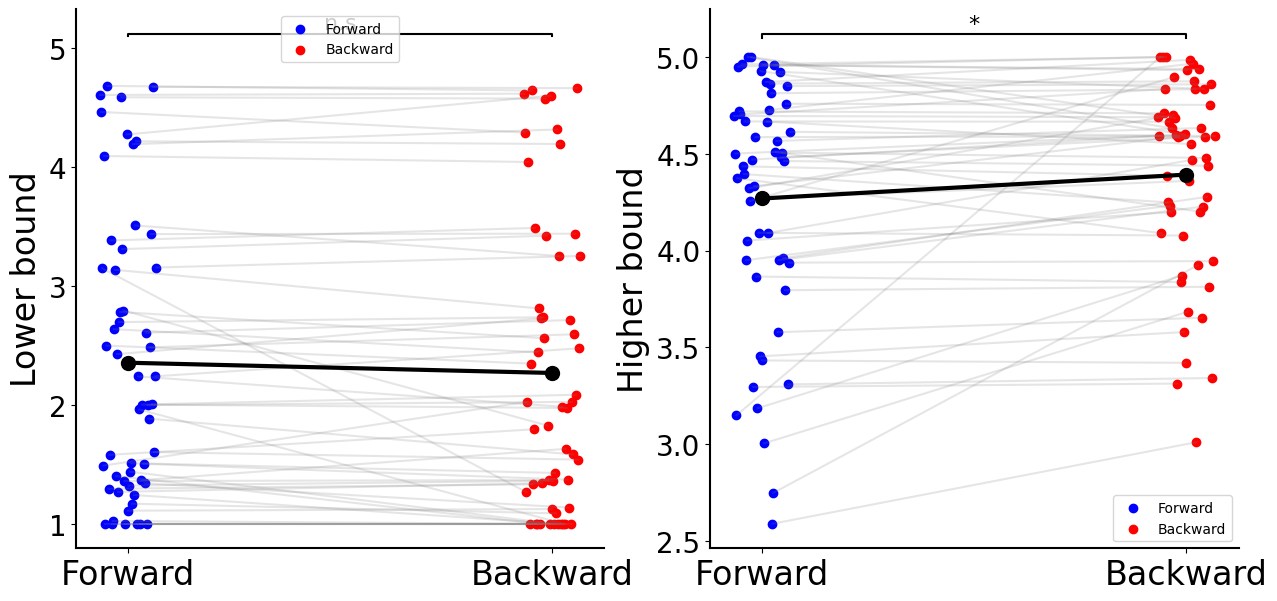

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
comparison_plot(
    df,
    "lbound",
    groups,
    "",
    [["Forward", "Backward"]],
    [5.1],
    [0.02],
    y_label="Lower bound",
)
plt.subplot(1, 2, 2)
comparison_plot(
    df,
    "hbound",
    groups,
    "",
    [["Forward", "Backward"]],
    [5.1],
    [0.02],
    y_label="Higher bound",
)
plt.savefig("../figs/bounds.png")

Statistics=535.0, p=0.07399888906236668


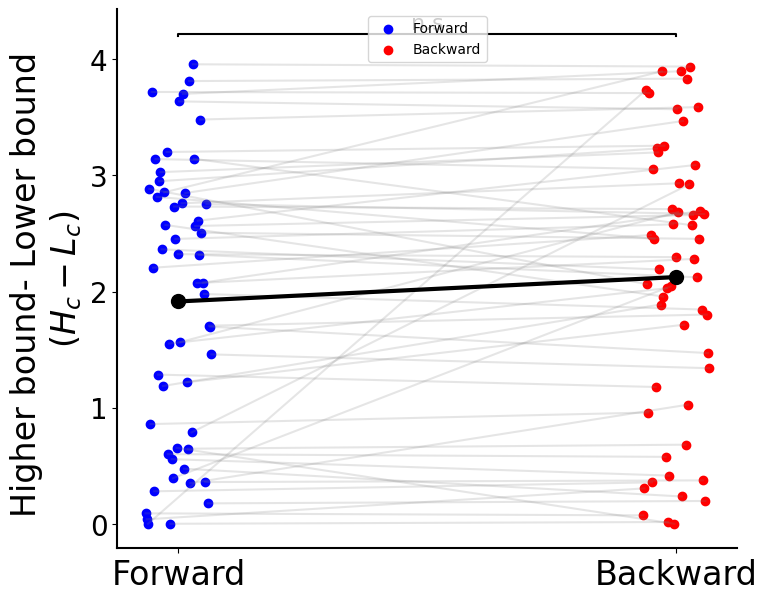

In [16]:
plt.figure(figsize=(8, 7))
df["Bound_Range"] = df["hbound"] - df["lbound"]
comparison_plot(
    df,
    "Bound_Range",
    groups,
    "",
    [["Forward", "Backward"]],
    [4.2],
    [0.02],
    y_label="Higher bound- Lower bound \n" + r"$(H_c - L_c$)",
)
plt.savefig("../figs/hc_lc.png", dpi=400)

Statistics=0.0, p=1.6256984569330967e-10


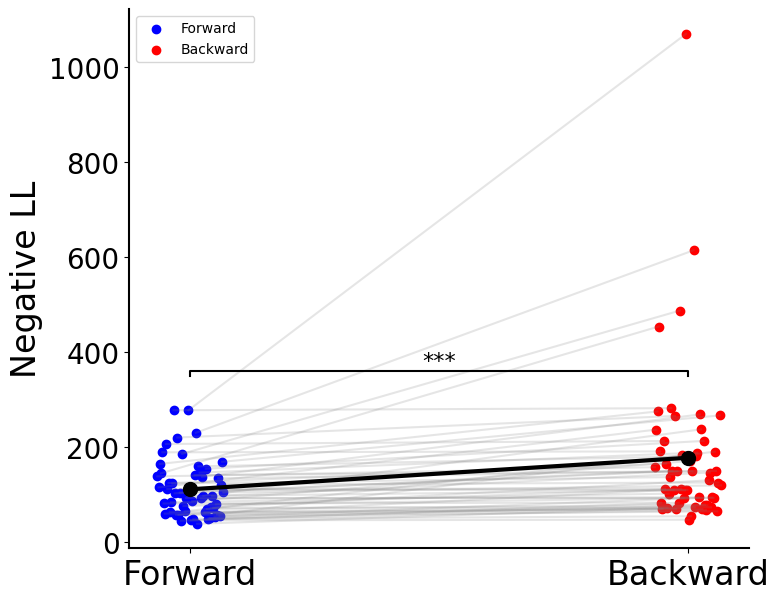

In [18]:
plt.figure(figsize=(8, 7))
# plt.subplot(1, 2, 1)
comparison_plot(
    df, "LL", groups, "", [["Forward", "Backward"]], [350], [10], y_label="Negative LL"
)
plt.savefig("../figs/neg_LL_compare.png", dpi=400)

Statistics=42.0, p=1.6248725257424653e-09


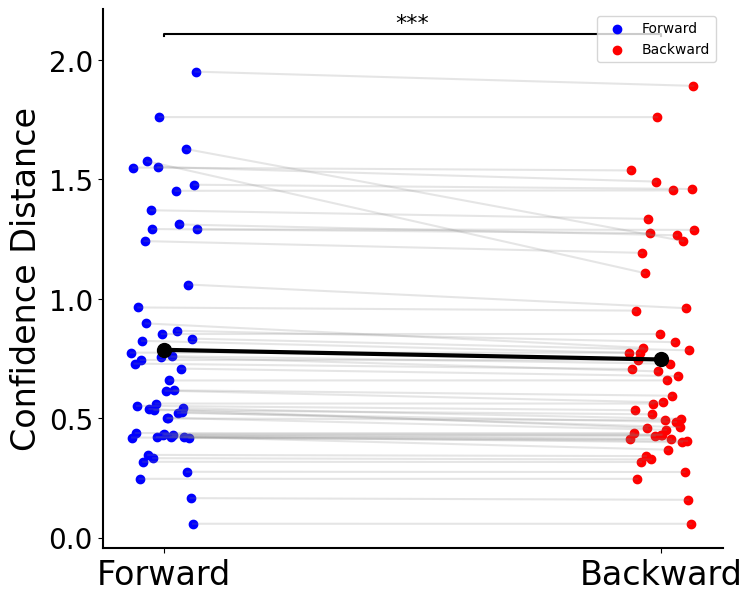

In [23]:
plt.figure(figsize=(8, 7))
# plt.subplot(1, 2, 1)
comparison_plot(
    df,
    "Confidence Distance",
    groups,
    "",
    [["Forward", "Backward"]],
    [2.1],
    [0.01],
    y_label="Confidence Distance",
    legend="upper right",
)
plt.savefig("../figs/conf_dist_compare.png", dpi=400)